In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.model_selection as skm

In [2]:
data = pd.read_csv('/Users/dereklorenzen/Desktop/Repository/Python/EnergyPolicy/Data/date_df.csv')

In [3]:
eda = data.drop(columns = ['Unnamed: 0','active','published','budget', 'implementing_sector_id', 'id'])

In [4]:
eda.columns

Index(['name_tech', 'name_energy', 'name_subtech', 'is_entire_state',
       'name_program', 'is_territory', 'state', 'name_type', 'name_category',
       'name_sector', 'months'],
      dtype='object')

In [5]:
eda.head()

,name_tech,name_energy,name_subtech,is_entire_state,name_program,is_territory,state,name_type,name_category,name_sector,months
0,Solar Technologies,Renewable Energy,Solar Water Heat,1,Renewable Portfolio Standard,0,NY,Renewables Portfolio Standard,Regulatory Policy,Commercial,137.261644
1,Solar Technologies,Renewable Energy,Solar Photovoltaics,1,Renewable Portfolio Standard,0,NY,Renewables Portfolio Standard,Regulatory Policy,Commercial,137.261644
2,Wind,Renewable Energy,Wind (All),1,Renewable Portfolio Standard,0,NY,Renewables Portfolio Standard,Regulatory Policy,Commercial,137.261644
3,Biomass,Renewable Energy,Biomass,1,Renewable Portfolio Standard,0,NY,Renewables Portfolio Standard,Regulatory Policy,Commercial,137.261644
4,Hydroelectric,Renewable Energy,Hydroelectric,1,Renewable Portfolio Standard,0,NY,Renewables Portfolio Standard,Regulatory Policy,Commercial,137.261644


In [6]:
eda_stateside = eda[eda['is_territory'] == 0].drop(columns = 'is_territory')
eda_stateside = eda_stateside[eda_stateside['state'] != 'TX']

In [7]:
state_month = eda_stateside[['state','months']].groupby(by = 'state').mean().sort_values(by = 'months', ascending = False)

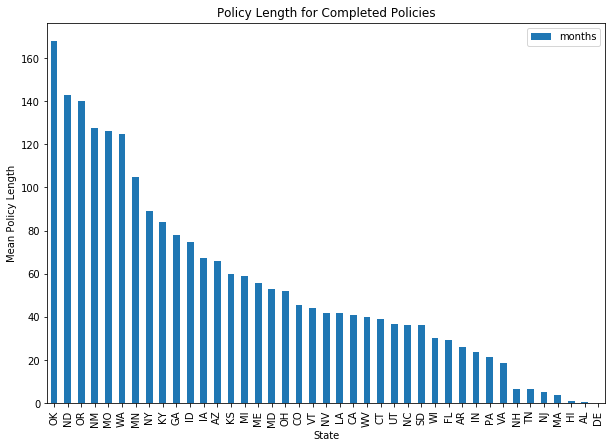

In [8]:
ax4 = state_month.plot.bar(figsize = (10, 7))
ax4.set_xlabel('State')
ax4.set_ylabel('Mean Policy Length')
ax4.set_title('Policy Length for Completed Policies')
plt.show()
fig4 = ax4.get_figure()

In [9]:
tech_type = eda_stateside[['months','name_tech']].groupby(by = 'name_tech').count().sort_values(by = 'months', ascending = False)

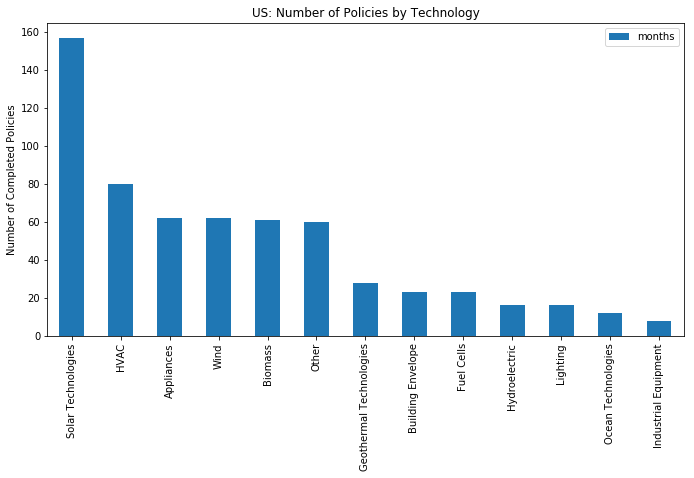

In [10]:
ax5 = tech_type.plot.bar(figsize = (10, 7))
ax5.axes.get_xaxis().get_label().set_visible(False)
ax5.set_ylabel('Number of Completed Policies')
ax5.set_title('US: Number of Policies by Technology');
fig5 = ax5.get_figure()
fig5.tight_layout(pad = 2)
fig5 = ax5.get_figure()

In [11]:
sector_month = eda_stateside[['months','name_sector','state']]

Text(0.5, 0.98, 'Duration by Sector')

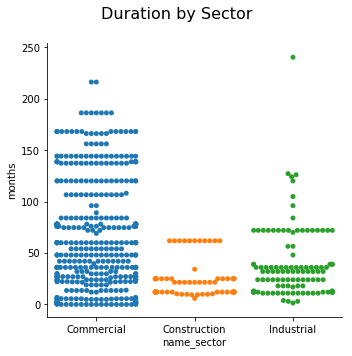

In [12]:
sns.catplot(x="name_sector", y="months", kind = 'swarm', data=sector_month)
fig6 = plt.gcf()
fig6.tight_layout()
fig6.subplots_adjust(top = 0.88)
fig6.suptitle('Duration by Sector', fontsize = 16)

/Users/dereklorenzen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'Duration by Sector (Violin)')

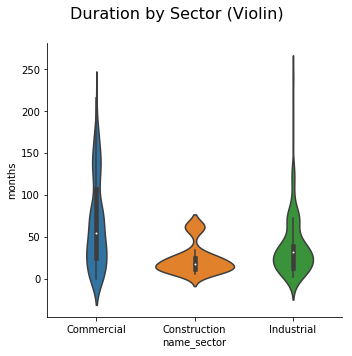

In [13]:
sns.catplot(x="name_sector", y="months", kind = 'violin', data=sector_month)
fig7 = plt.gcf()
fig7.tight_layout()
fig7.subplots_adjust(top = 0.88)
fig7.suptitle('Duration by Sector (Violin)', fontsize = 16)

In [14]:
bystate = eda_stateside[['state','months','name_energy','name_category','name_sector']]

In [15]:
grouped = pd.DataFrame(bystate.groupby(by = ['state','name_energy','name_category','name_sector']).mean().reset_index())

In [16]:
out = bystate[['name_energy', 'name_category','months','state']]
out1 = out.groupby(by = ['state','name_energy'])

# Models

In [21]:
# Run linear regression on Sector predicting Policy Length
# Try to get some budget info
#pd.tonumeric
#statsmodels.summary()

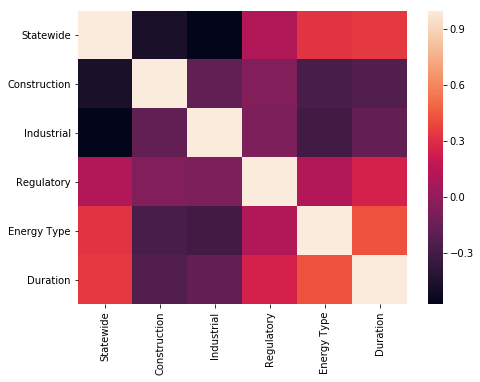

In [22]:
x = pd.get_dummies(eda_stateside[['name_sector', 'name_category', 'name_energy','is_entire_state']], drop_first = True)
x = sm.add_constant(x)
y = eda_stateside['months']
dat = x.drop(columns = 'const')
dat['months'] = y
corr = dat.corr()
values = ['Statewide','Construction','Industrial','Regulatory','Energy Type','Duration']
sns.heatmap(corr, xticklabels=values, yticklabels=values)
fig8 = plt.gcf()
fig8.set_size_inches(7,6)
fig8.tight_layout()
fig8.subplots_adjust(top = 0.88)
fig8.subplots_adjust(bottom = 0.2)

In [23]:
eda_stateside.head()

,name_tech,name_energy,name_subtech,is_entire_state,name_program,state,name_type,name_category,name_sector,months
0,Solar Technologies,Renewable Energy,Solar Water Heat,1,Renewable Portfolio Standard,NY,Renewables Portfolio Standard,Regulatory Policy,Commercial,137.261644
1,Solar Technologies,Renewable Energy,Solar Photovoltaics,1,Renewable Portfolio Standard,NY,Renewables Portfolio Standard,Regulatory Policy,Commercial,137.261644
2,Wind,Renewable Energy,Wind (All),1,Renewable Portfolio Standard,NY,Renewables Portfolio Standard,Regulatory Policy,Commercial,137.261644
3,Biomass,Renewable Energy,Biomass,1,Renewable Portfolio Standard,NY,Renewables Portfolio Standard,Regulatory Policy,Commercial,137.261644
4,Hydroelectric,Renewable Energy,Hydroelectric,1,Renewable Portfolio Standard,NY,Renewables Portfolio Standard,Regulatory Policy,Commercial,137.261644


1. Business Sector to predict Duration

In [24]:
x = pd.get_dummies(sector_month.drop(columns = ['state','months']), drop_first = True)
x = sm.add_constant(x)
y = sector_month.drop(columns = ['name_sector', 'state'])
x_tr, x_1, y_tr, y_1 = skm.train_test_split(x, y, test_size = 0.5, shuffle = True)

In [25]:
mod1 = sm.OLS(y_tr, x_tr).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                 months   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     15.21
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           5.11e-07
Time:                        09:29:01   Log-Likelihood:                -1597.1
No. Observations:                 304   AIC:                             3200.
Df Residuals:                     301   BIC:                             3211.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

2. Complicating the model with statewide

In [26]:
x = eda_stateside['is_entire_state']
x = sm.add_constant(x)
y = eda_stateside['months']
x_tr, x_2, y_tr, y_2 = skm.train_test_split(x, y, test_size = 0.5, shuffle = True)

In [27]:
mod2 = sm.OLS(y_tr, x_tr).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                 months   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     32.60
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           2.71e-08
Time:                        09:29:06   Log-Likelihood:                -1598.9
No. Observations:                 304   AIC:                             3202.
Df Residuals:                     302   BIC:                             3209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              35.0995      4.356     

In [28]:
x = pd.get_dummies(eda_stateside[['name_sector', 'name_category', 'name_energy','is_entire_state']], drop_first = True)
x = sm.add_constant(x)
y = eda_stateside['months']
x_tr, x_3, y_tr, y_3 = skm.train_test_split(x, y, test_size = 0.5, shuffle = True)

In [29]:
mod3 = sm.OLS(y_tr, x_tr).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                 months   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     20.47
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           1.45e-17
Time:                        09:29:09   Log-Likelihood:                -1568.4
No. Observations:                 304   AIC:                             3149.
Df Residuals:                     298   BIC:                             3171.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Predictions

Text(0.5, 0.98, 'Decent Models \n Duration ~ Sector + Statewide + Category + Type')

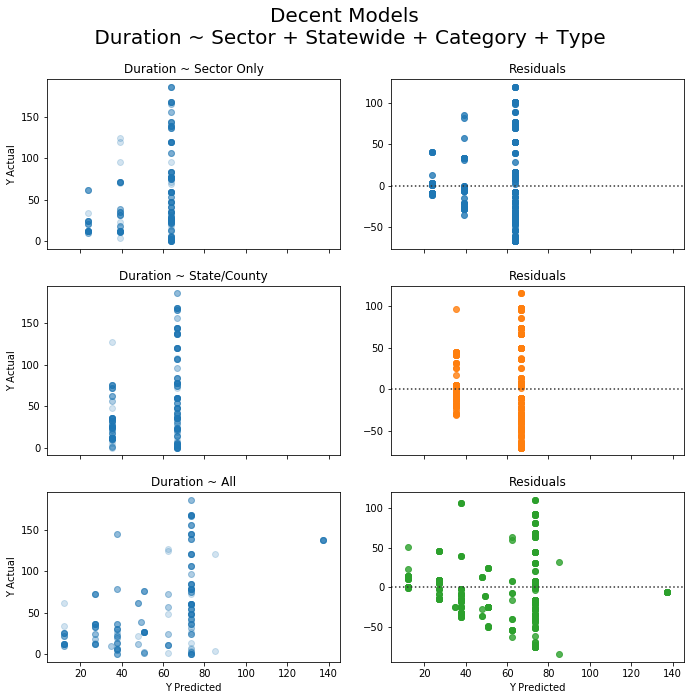

In [34]:
y_1p = np.array(mod1.predict(x_1)).reshape(-1,1)
y_2p = np.array(mod2.predict(x_2)).reshape(-1,1)
y_3p = np.array(mod3.predict(x_3)).reshape(-1,1)
y_1a = np.array(y_1).reshape(-1,1)
y_2a = np.array(y_2).reshape(-1,1)
y_3a = np.array(y_3).reshape(-1,1)
fig9, (ax1, ax2, ax3) = plt.subplots(3, 2, sharex = True, figsize = (10,10))
ax1[0].scatter(y_1p, y_1a, alpha = 0.2)
sns.residplot(y_1p, y_1a, ax = ax1[1])
ax2[0].scatter(y_2p, y_2a, alpha = 0.2)
sns.residplot(y_2p, y_2a, ax = ax2[1])
ax3[0].scatter(y_3p, y_3a, alpha = 0.2)
sns.residplot(y_3p, y_3a, ax = ax3[1])
ax1[0].set_title('Duration ~ Sector Only')
ax2[0].set_title('Duration ~ State/County')
ax3[0].set_title('Duration ~ All')
ax1[1].set_title('Residuals')
ax2[1].set_title('Residuals')
ax3[1].set_title('Residuals')
ax3[0].set_xlabel('Y Predicted')
ax3[1].set_xlabel('Y Predicted')
ax1[0].set_ylabel('Y Actual')
ax2[0].set_ylabel('Y Actual')
ax3[0].set_ylabel('Y Actual')
fig9.tight_layout(pad = 2)
fig9.subplots_adjust(top = 0.88)
fig9.suptitle('Decent Models \n Duration ~ Sector + Statewide + Category + Type', fontsize = 20)

# New Grouped Data: Models

In [36]:
state_agg = pd.DataFrame(eda_stateside[['months', 'name_category', 'name_sector', 'state']].groupby(by = ['state','name_category', 'name_sector']).mean().reset_index())
x = pd.get_dummies(state_agg.drop(columns = ['months','state']), drop_first = True)
x = sm.add_constant(x)
y = state_agg['months']
x_tr, x_5, y_tr, y_5 = skm.train_test_split(x, y, test_size = 0.5, shuffle = True)

In [37]:
mod5 = sm.OLS(y_tr, x_tr).fit()
print(mod5.summary())

                            OLS Regression Results                            
Dep. Variable:                 months   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2.631
Date:                Fri, 15 Feb 2019   Prob (F-statistic):             0.0712
Time:                        09:35:10   Log-Likelihood:                -160.61
No. Observations:                  30   AIC:                             329.2
Df Residuals:                      26   BIC:                             334.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [38]:
x = pd.get_dummies(eda_stateside[['name_sector', 'name_energy', 'is_entire_state']], drop_first = True)
x = sm.add_constant(x)
x['sector_other'] = x['name_sector_Construction'] + x['name_sector_Industrial']
x.drop(columns = ['name_sector_Construction', 'name_sector_Industrial'], inplace = True)
y = eda_stateside['months']
x_tr, x_4, y_tr, y_4 = skm.train_test_split(x, y, test_size = 0.5, shuffle = True)

In [39]:
mod4 = sm.OLS(y_tr, x_tr).fit()
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                 months   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     26.90
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           1.95e-15
Time:                        09:35:15   Log-Likelihood:                -1585.1
No. Observations:                 304   AIC:                             3178.
Df Residuals:                     300   BIC:                             3193.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Text(0.5, 0.98, 'Best Model \n Duration ~ Sector(Majority) + Statewide + Type')

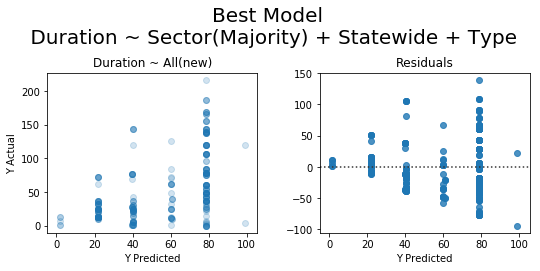

In [41]:
y_4p = np.array(mod4.predict(x_4)).reshape(-1,1)
y_4a = np.array(y_4).reshape(-1,1)
fig11, ax1 = plt.subplots(1, 2, sharex = True, figsize = (8,4))
ax1[0].scatter(y_4p, y_4a, alpha = 0.2)
sns.residplot(y_4p, y_4a, ax = ax1[1])
ax1[0].set_title('Duration ~ All(new)')
ax1[1].set_title('Residuals')
ax1[0].set_xlabel('Y Predicted')
ax1[1].set_xlabel('Y Predicted')
ax1[0].set_ylabel('Y Actual')
fig11.tight_layout(pad = 2.5)
fig11.subplots_adjust(top = 0.75)
fig11.suptitle('Best Model \n Duration ~ Sector(Majority) + Statewide + Type', fontsize = 20)

In [42]:
names = {'const':'Const.', 'is_entire_state':'Statewide', 'name_energy_Renewable Energy':'Type', 'sector_other':'Sector_Majority','y':'Duration',}
x_4['y'] = y_4
x_4Nice = x_4.rename(index = str, columns = names)
x_4Nice.head()

/Users/dereklorenzen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Const.,Statewide,Type,Sector_Majority,Duration
380,1.0,1,1,0,106.619178
12,1.0,1,1,0,137.261644
48,1.0,1,1,0,84.000000
224,1.0,1,1,0,41.983562
35,1.0,1,1,0,60.000000


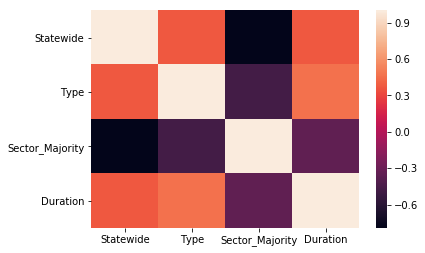

In [43]:
fig10, ax1 = plt.subplots()
a = sns.heatmap(x_4Nice.drop(columns = 'Const.').corr(), ax = ax1)

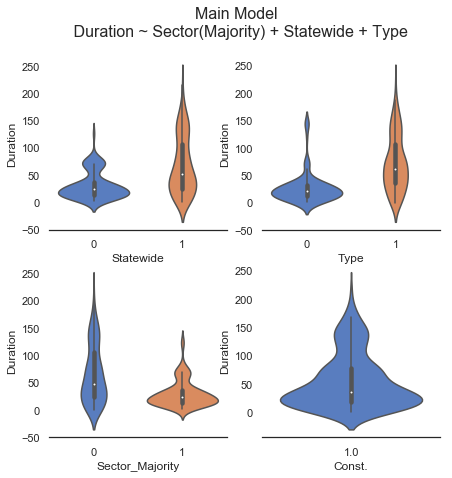

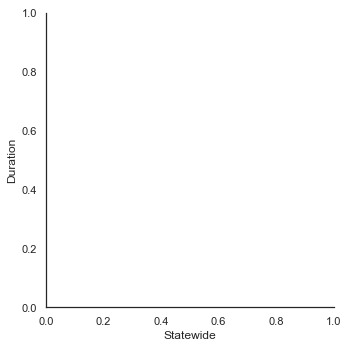

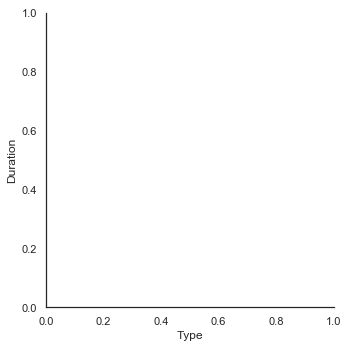

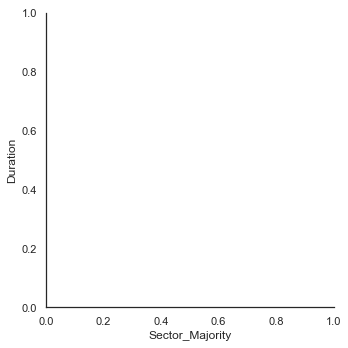

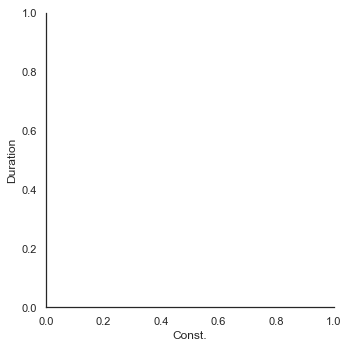

In [44]:
sns.set(style="white", palette="muted", color_codes=True)
fig12, ax1 = plt.subplots(2, 2, figsize=(7, 7))
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.catplot(x = 'Statewide', y = 'Duration', kind = 'violin', data = x_4Nice, ax = ax1[0,0]);
sns.catplot(x = 'Type', y = 'Duration', kind = 'violin', data = x_4Nice, ax = ax1[0, 1]);
sns.catplot(x = 'Sector_Majority', y = 'Duration', kind = 'violin', data = x_4Nice, ax = ax1[1, 0]);
sns.catplot(x = 'Const.', y = 'Duration', kind = 'violin', data = x_4Nice, ax = ax1[1, 1]);
fig12.suptitle('Main Model \n Duration ~ Sector(Majority) + Statewide + Type', fontsize = 16)
plt.tight_layout()

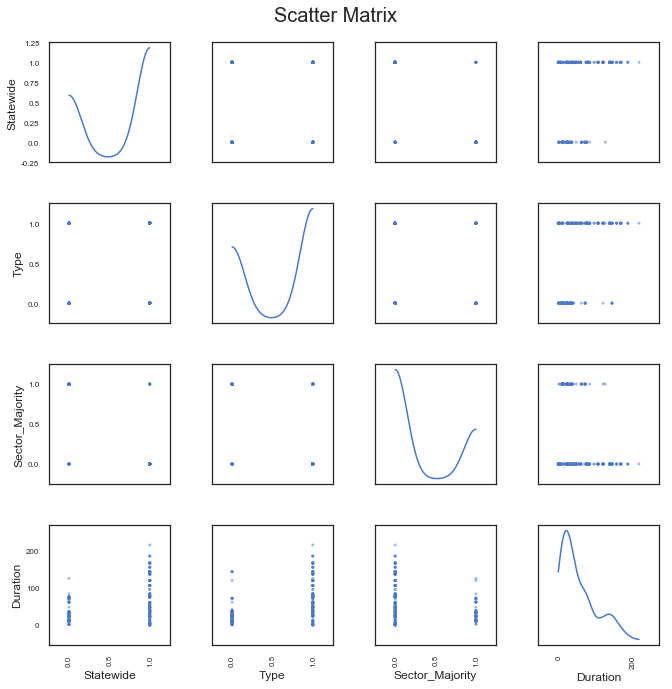

In [45]:
pd.plotting.scatter_matrix(x_4Nice.drop(columns = 'Const.'), figsize = (10,10), diagonal = 'kde', range_padding = 0.5)
fig13 = plt.gcf()
fig13.suptitle('Scatter Matrix', fontsize = 20)
fig13.tight_layout(pad = 2.5)
fig13.subplots_adjust(top = 0.93)

In [46]:
# UPDATE FIGURES
fig4.savefig('/Users/dereklorenzen/Desktop/Repository/Python/EnergyPolicy/images/mean_length_by_state.png', bbox_inches='tight')
fig5.savefig('/Users/dereklorenzen/Desktop/Repository/Python/EnergyPolicy/images/policy_number_by_tech.png', bbox_inches='tight')
fig6.savefig('/Users/dereklorenzen/Desktop/Repository/Python/EnergyPolicy/images/sector_to_duration_swa2.png', bbox_inches='tight')
fig7.savefig('/Users/dereklorenzen/Desktop/Repository/Python/EnergyPolicy/images/sector_to_duration_vio2.png', bbox_inches='tight')
fig8.savefig('/Users/dereklorenzen/Desktop/Repository/Python/EnergyPolicy/images/correlation_matrix.png', bbox_inches='tight')
fig9.savefig('/Users/dereklorenzen/Desktop/Repository/Python/EnergyPolicy/images/pred_act_residuals.png', bbox_inches='tight')
fig10.savefig('/Users/dereklorenzen/Desktop/Repository/Python/EnergyPolicy/images/heat_map.png', bbox_inches='tight')
fig11.savefig('/Users/dereklorenzen/Desktop/Repository/Python/EnergyPolicy/images/main_model_pred_act.png', bbox_inches='tight')
fig12.savefig('/Users/dereklorenzen/Desktop/Repository/Python/EnergyPolicy/images/main_model_catplot.png', bbox_inches='tight')
fig13.savefig('/Users/dereklorenzen/Desktop/Repository/Python/EnergyPolicy/images/scatter_matrix.png', bbox_inches='tight')